## TODO:
 - Unify image shapes **X**
 - Visualize few cells **X**
 - Data augmentation **X**
 - Label data (by directory path?) **X**
 - Split data into training and test sets
 - Basic CNN
 - More elaborate CNNs
 - Hyperopt? (Hyperas)
 - Transfer Learning?
 - General refactor

In [1]:
import numpy as np
np.random.seed(2020)

import os
import cv2
import pandas as pd
from PIL import Image
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

## Load Images

In [2]:
parasitized = './cell_images/Parasitized/'
uninfected = './cell_images/Uninfected/'

In [3]:
def load_images(dir_path, image_list, label_list, label):
    for img in os.listdir(dir_path):
        if img.endswith('.png'):
            image = cv2.imread(dir_path + img)
            image_list.append(image)
            label_list.append(label)

In [4]:
images = []
labels = []

In [5]:
load_images(uninfected, images, labels, 0)
load_images(parasitized, images, labels, 1)

In [6]:
X = np.array(images)
y = np.array(labels)

In [7]:
print(X.shape, y.shape)

(27558,) (27558,)


# Visualisation

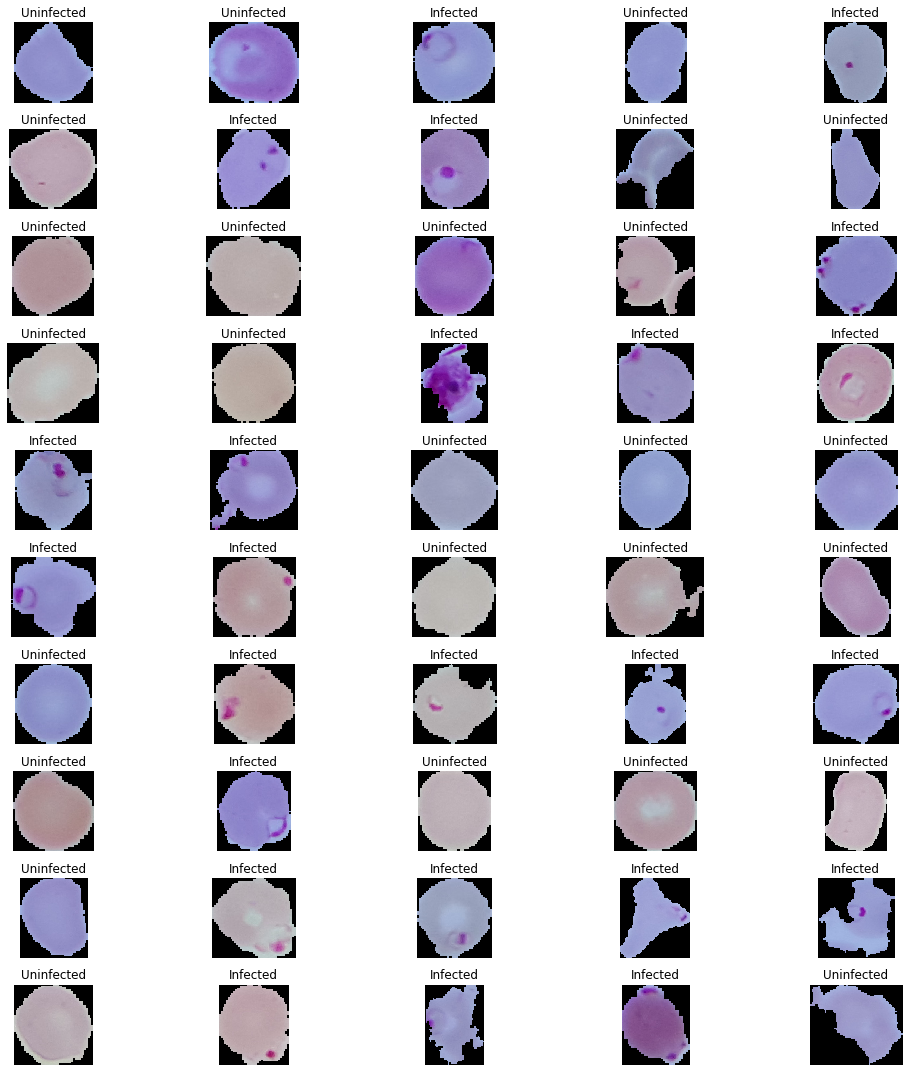

In [8]:
plt.figure(figsize=(15, 15))
for i in range(50):
    random = np.random.randint(0, 27558)
    plt.subplot(10, 5, i+1)
    plt.imshow(X[random][:])
    plt.title('Infected' if y[random] == 1 else 'Uninfected')
    plt.axis('off')
    
plt.tight_layout()

In [9]:
counter = dict(Counter(y))

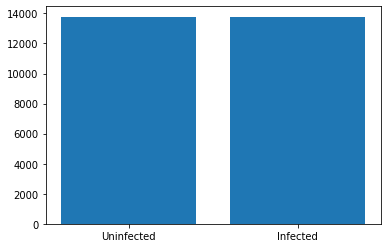

In [10]:
plt.bar(['Uninfected', 'Infected'], counter.values());

In [11]:
def get_img_shapes(images):
    shapes = [list(np.array(image).shape) for image in images]
    width = [shape[0] for shape in shapes]
    height = [shape[1] for shape in shapes]
    
    return (width, height)

In [12]:
def plot_shapes(width, height):
    figsize=(12, 8)
    fontsize=16
    plt.figure(figsize=figsize)
    plt.hist(width, bins=150)
    plt.title('Images widths', fontsize=fontsize)
    plt.figure(figsize=figsize)
    plt.hist(height, bins=150)
    plt.title('Images heights', fontsize=fontsize)
    plt.figure(figsize=figsize)
    plt.scatter(width, height)
    plt.xlabel('Widths')
    plt.ylabel('Heights')
    plt.title('Images widths and heights', fontsize=fontsize)

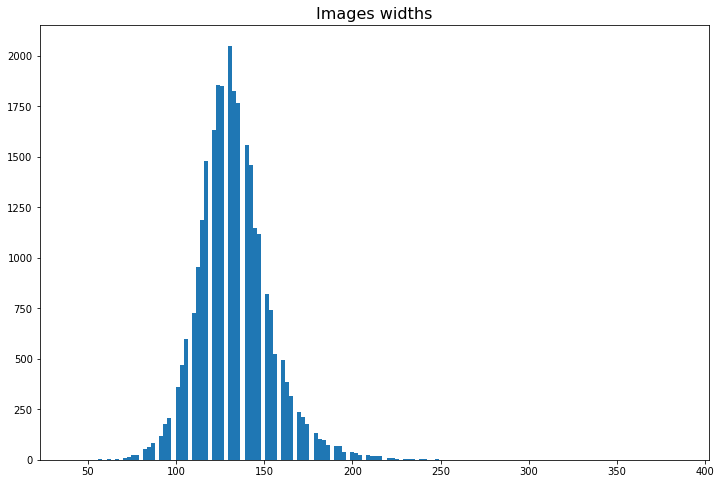

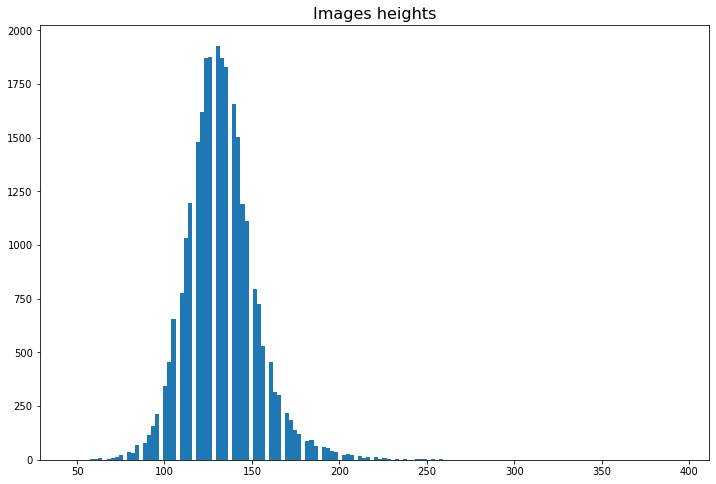

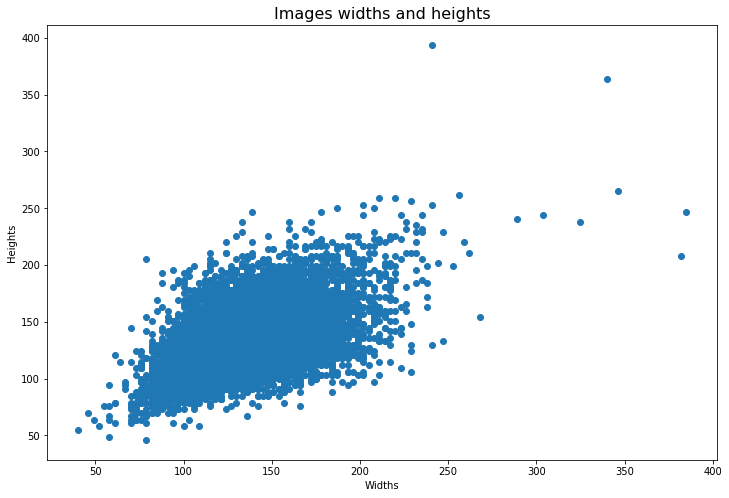

In [13]:
width, height = get_img_shapes(images)
plot_shapes(width, height)

In [14]:
median_height = np.median(height).astype('int64')
median_width = np.median(width).astype('int64')
median_shape = (median_width, median_height)
median_shape

(130, 130)

## Shape normalization

In [15]:
#TODO: simplify
for idx, image in enumerate(images):
    images[idx] = np.array(Image.fromarray(image, 'RGB').resize(median_shape))

In [16]:
X = np.array(images)

In [17]:
X.shape

(27558, 130, 130, 3)

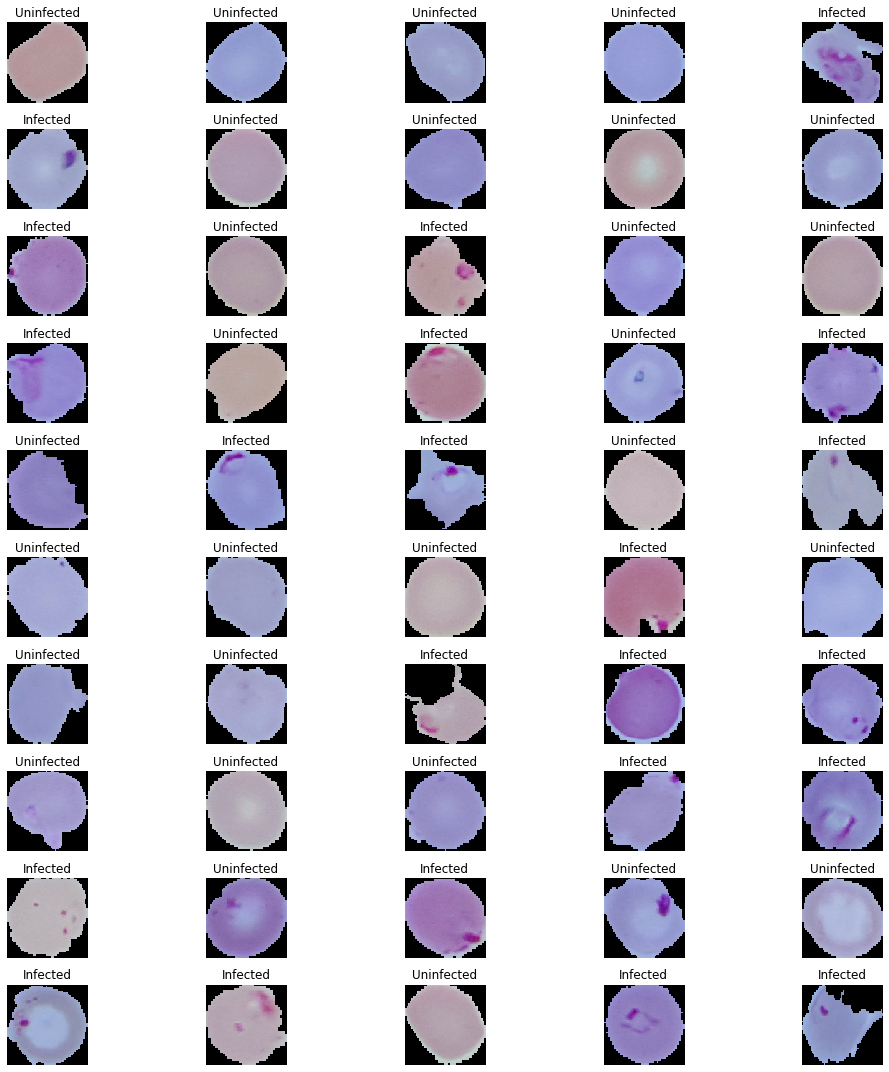

In [18]:
plt.figure(figsize=(15, 15))
for i in range(50):
    random = np.random.randint(0, 27558)
    plt.subplot(10, 5, i+1)
    plt.imshow(X[random])
    plt.title('Infected' if y[random] == 1 else 'Uninfected')
    plt.axis('off')
    
plt.tight_layout()

## Data augmentation

In [ ]:
#TODO: simplify, find more ways to augment
for idx, image in enumerate(images):
    label = labels[idx]
    images.append(np.array(Image.fromarray(image, 'RGB').rotate(25)))
    labels.append(label)
    images.append(np.array(Image.fromarray(image, 'RGB').rotate(45)))
    labels.append(label)
    images.append(np.array(Image.fromarray(image, 'RGB').rotate(75)))
    labels.append(label)
    images.append(np.array(Image.fromarray(image, 'RGB').rotate(90)))
    labels.append(label)
    images.append(np.array(Image.fromarray(image, 'RGB').rotate(120)))
    labels.append(label)
    images.append(np.array(Image.fromarray(image, 'RGB').rotate(180)))
    labels.append(label)

In [ ]:
X = np.array(images)

In [ ]:
X.shape